In [2]:
import pandas as pd
import plotnine
from plotnine import * 

SEED = 42
K_FOLDS = 5
REPLACEMENT_LEVELS = [25, 50, 100, 250, 500, 1000]
LATENT_FACTORS = [1, 2, 3, 4, 5]

In [93]:
men_df = pd.read_csv('data/men_data.csv')
women_df = pd.read_csv('data/women_data.csv')

### Climbers above Replacement Level 

/Users/victorhau/.pyenv/versions/3.10.2/lib/python3.10/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 14 x 6 in image.
/Users/victorhau/.pyenv/versions/3.10.2/lib/python3.10/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: results/eda/climbers_above_replacement_level.png


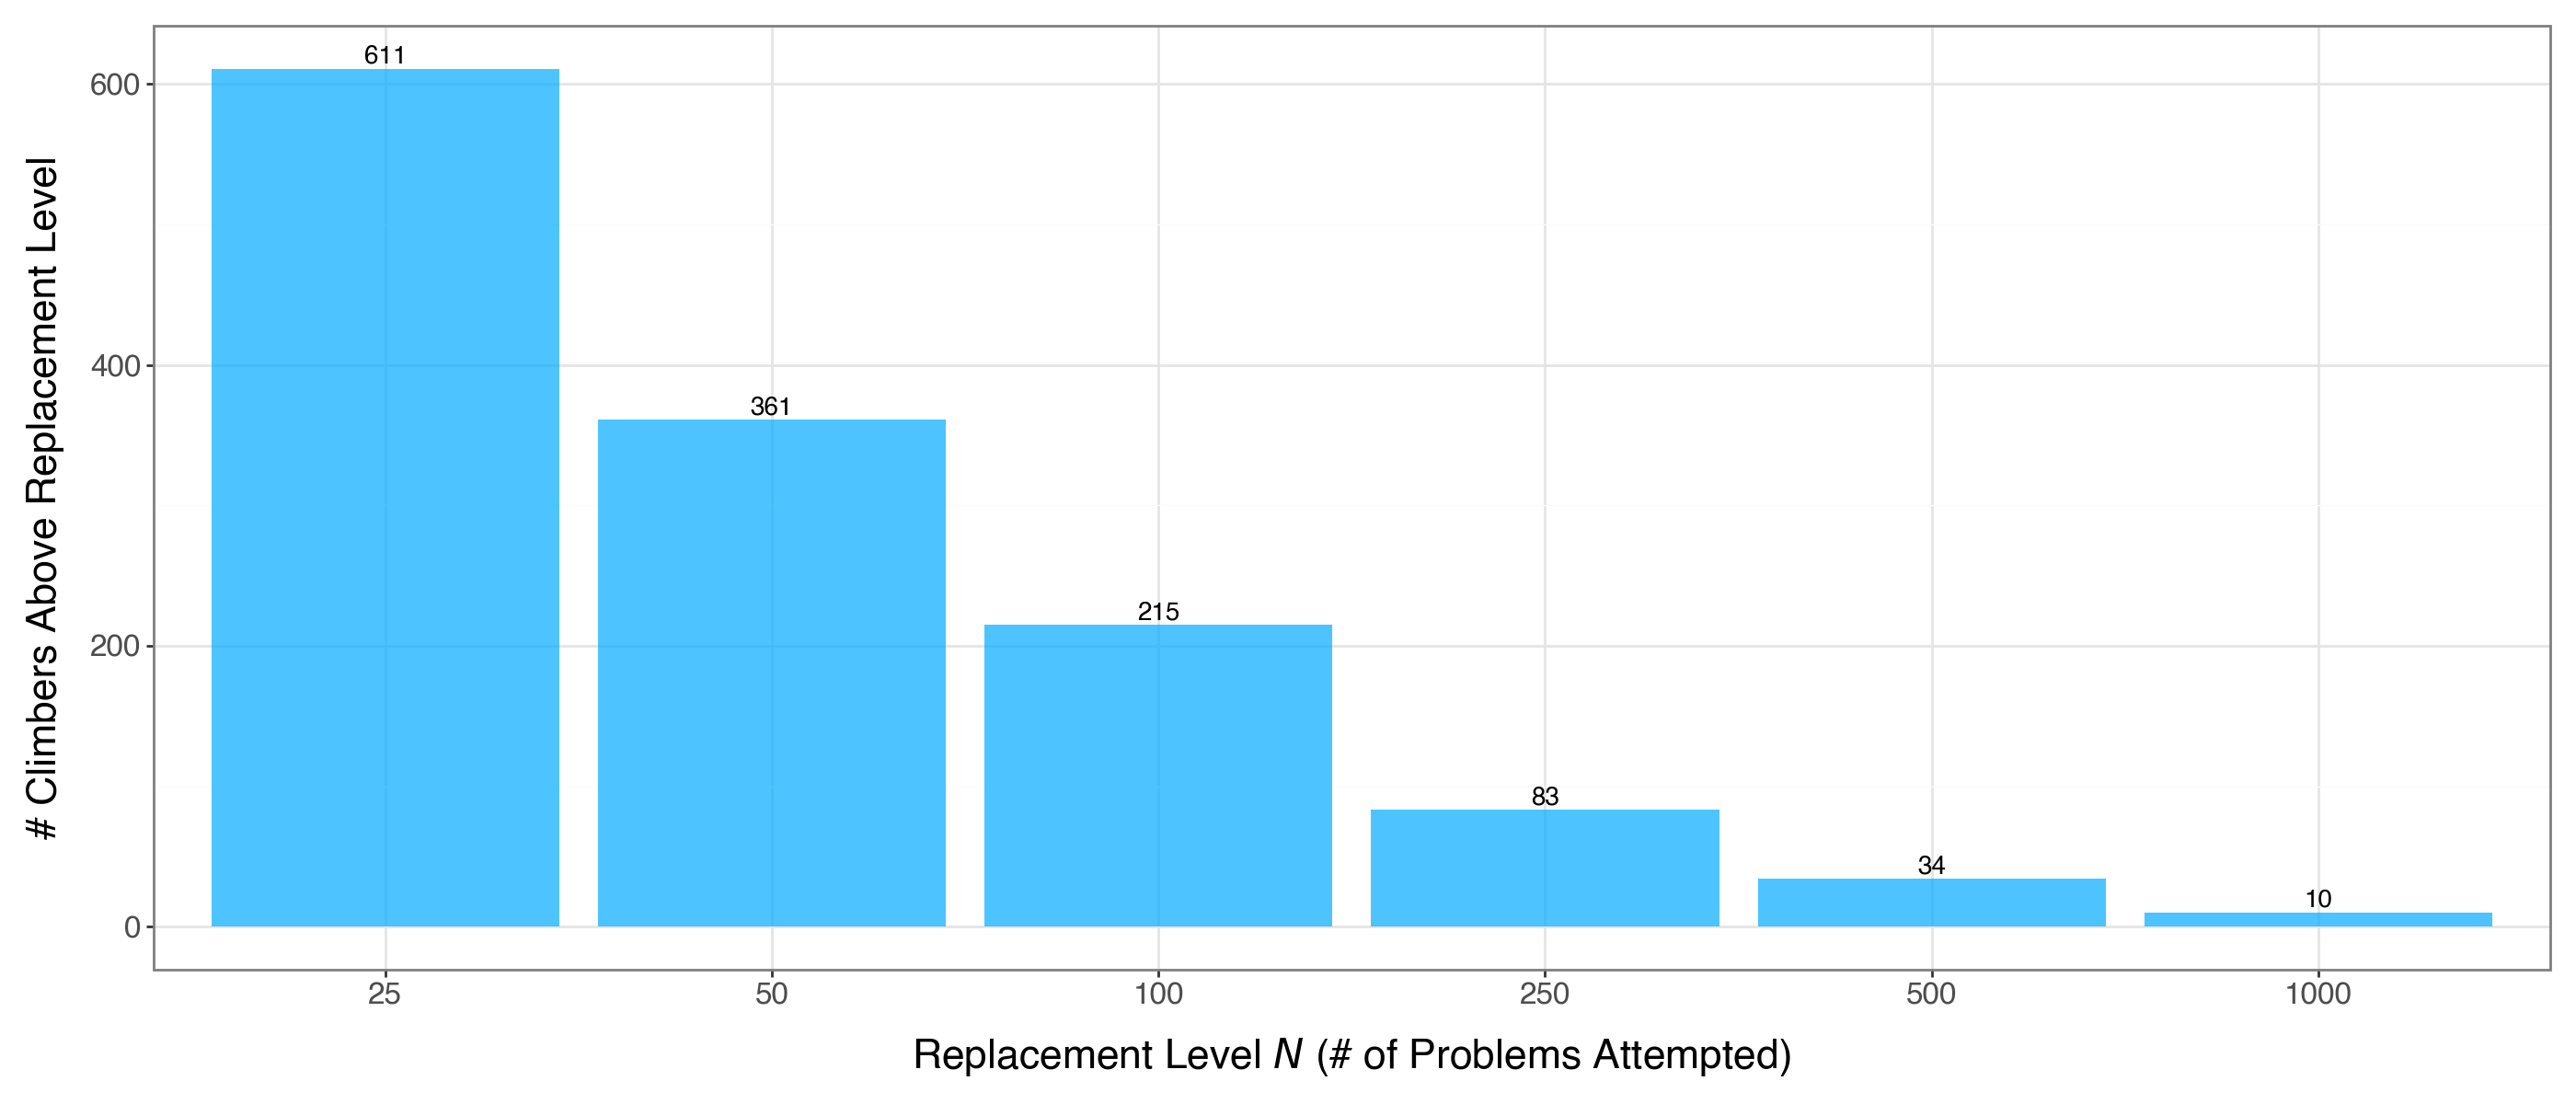

In [124]:
attempt_counts = men_df['Name'].value_counts()
climbers_above = [sum(attempt_counts > level) for level in REPLACEMENT_LEVELS]
plot_df = pd.DataFrame({
        'Replacement Level': REPLACEMENT_LEVELS,
        'Climbers Above': climbers_above
    })
plot_df['Replacement Level'] = plot_df['Replacement Level'].astype('category')
plotnine.options.figure_size = (14,6)
p = (
    ggplot(plot_df, aes(x='Replacement Level', y='Climbers Above'))
    + geom_bar(stat='identity', fill='#00abff', alpha=0.7, width = 0.9)
    + geom_text(aes(label='Climbers Above'), va='bottom', size=10)
    + labs(
        x='Replacement Level $N$ (# of Problems Attempted)',
        y='# Climbers Above Replacement Level',
    )    
    + theme_bw()
    + theme(axis_title_x=element_text(size=16), axis_title_y=element_text(size=16), axis_text_x=element_text(size=12), 
        axis_text_y=element_text(size=12), )
    + scale_x_discrete())
p.save('results/eda/climbers_above_replacement_level.png', dpi=600)
p

/Users/victorhau/.pyenv/versions/3.10.2/lib/python3.10/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 12 x 6 in image.
/Users/victorhau/.pyenv/versions/3.10.2/lib/python3.10/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: results/eda/cdf_climber_attempts


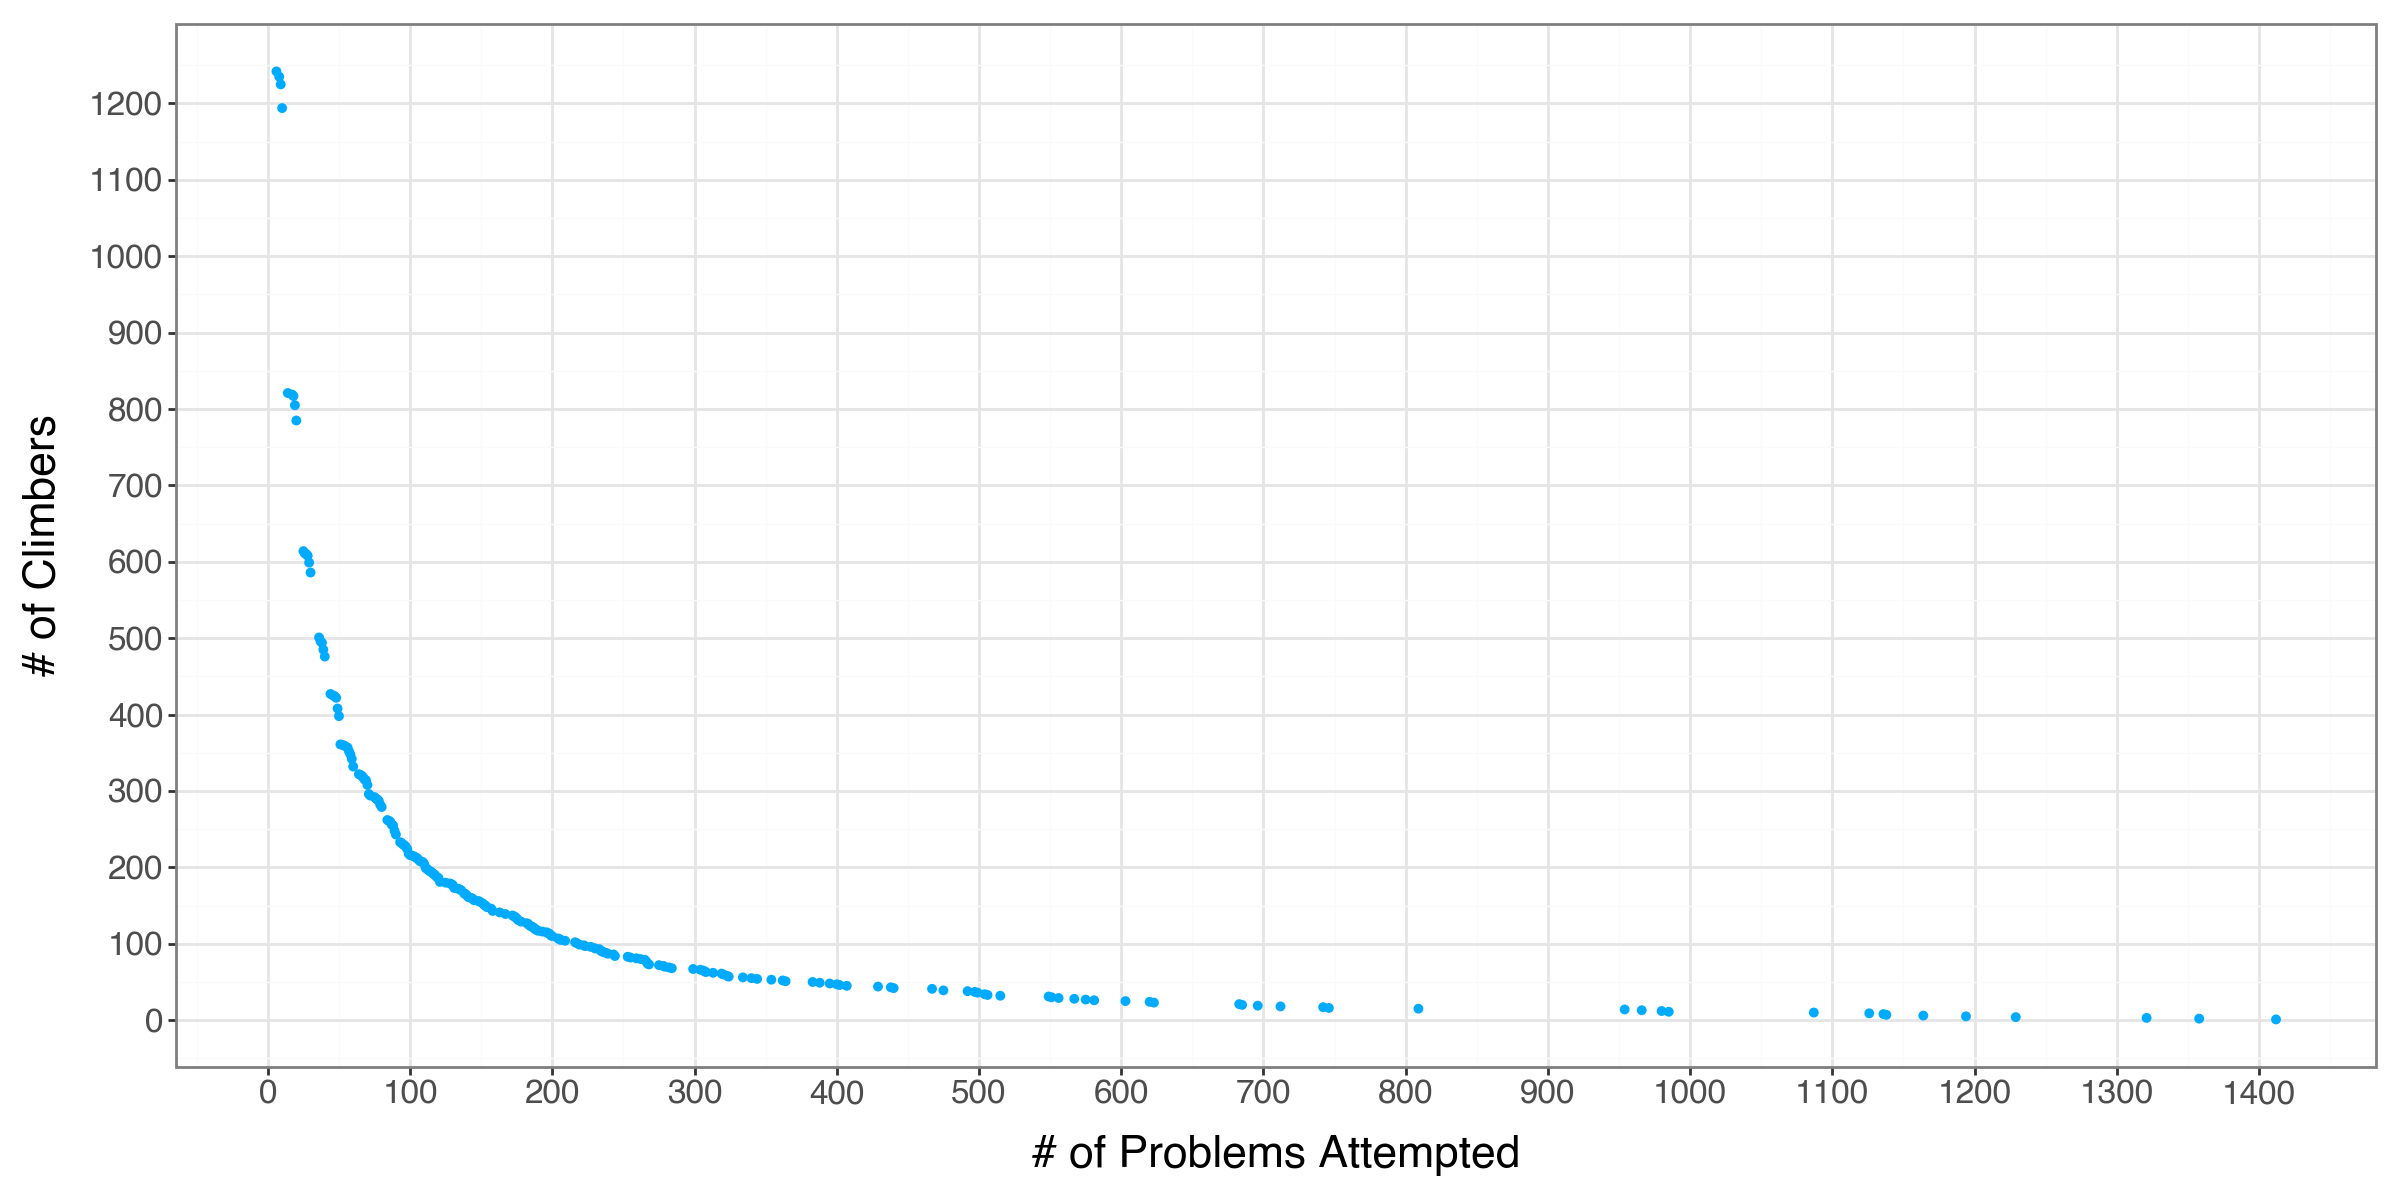

In [235]:
unique_attempts = sorted(attempt_counts.unique())
cumulative_distribution = [sum(attempt_counts >= level) for level in unique_attempts]

plot_df = pd.DataFrame({
    'Attempts': unique_attempts,
    'Climbers': cumulative_distribution
})
p = (
    ggplot(plot_df, aes(x='Attempts', y='Climbers'))
    + geom_point(color='#00abff', size=1)
    + labs(x='# of Problems Attempted', y='# of Climbers')
    + scale_y_continuous(
        breaks = range(0,1250,100))
    + scale_x_continuous(
        breaks = range(0,1833,100))
    + theme_bw()
    + theme(
        axis_title_x=element_text(size=16),
        axis_title_y=element_text(size=16),
        axis_text_x=element_text(size=12),
        axis_text_y=element_text(size=12))
)

p.save('results/eda/cdf_climber_attempts', dpi=300)

p

### Min Freq of Problems Attempted

/Users/victorhau/.pyenv/versions/3.10.2/lib/python3.10/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 16 x 6 in image.
/Users/victorhau/.pyenv/versions/3.10.2/lib/python3.10/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: results/eda/problem_id_frequency_histogram.png


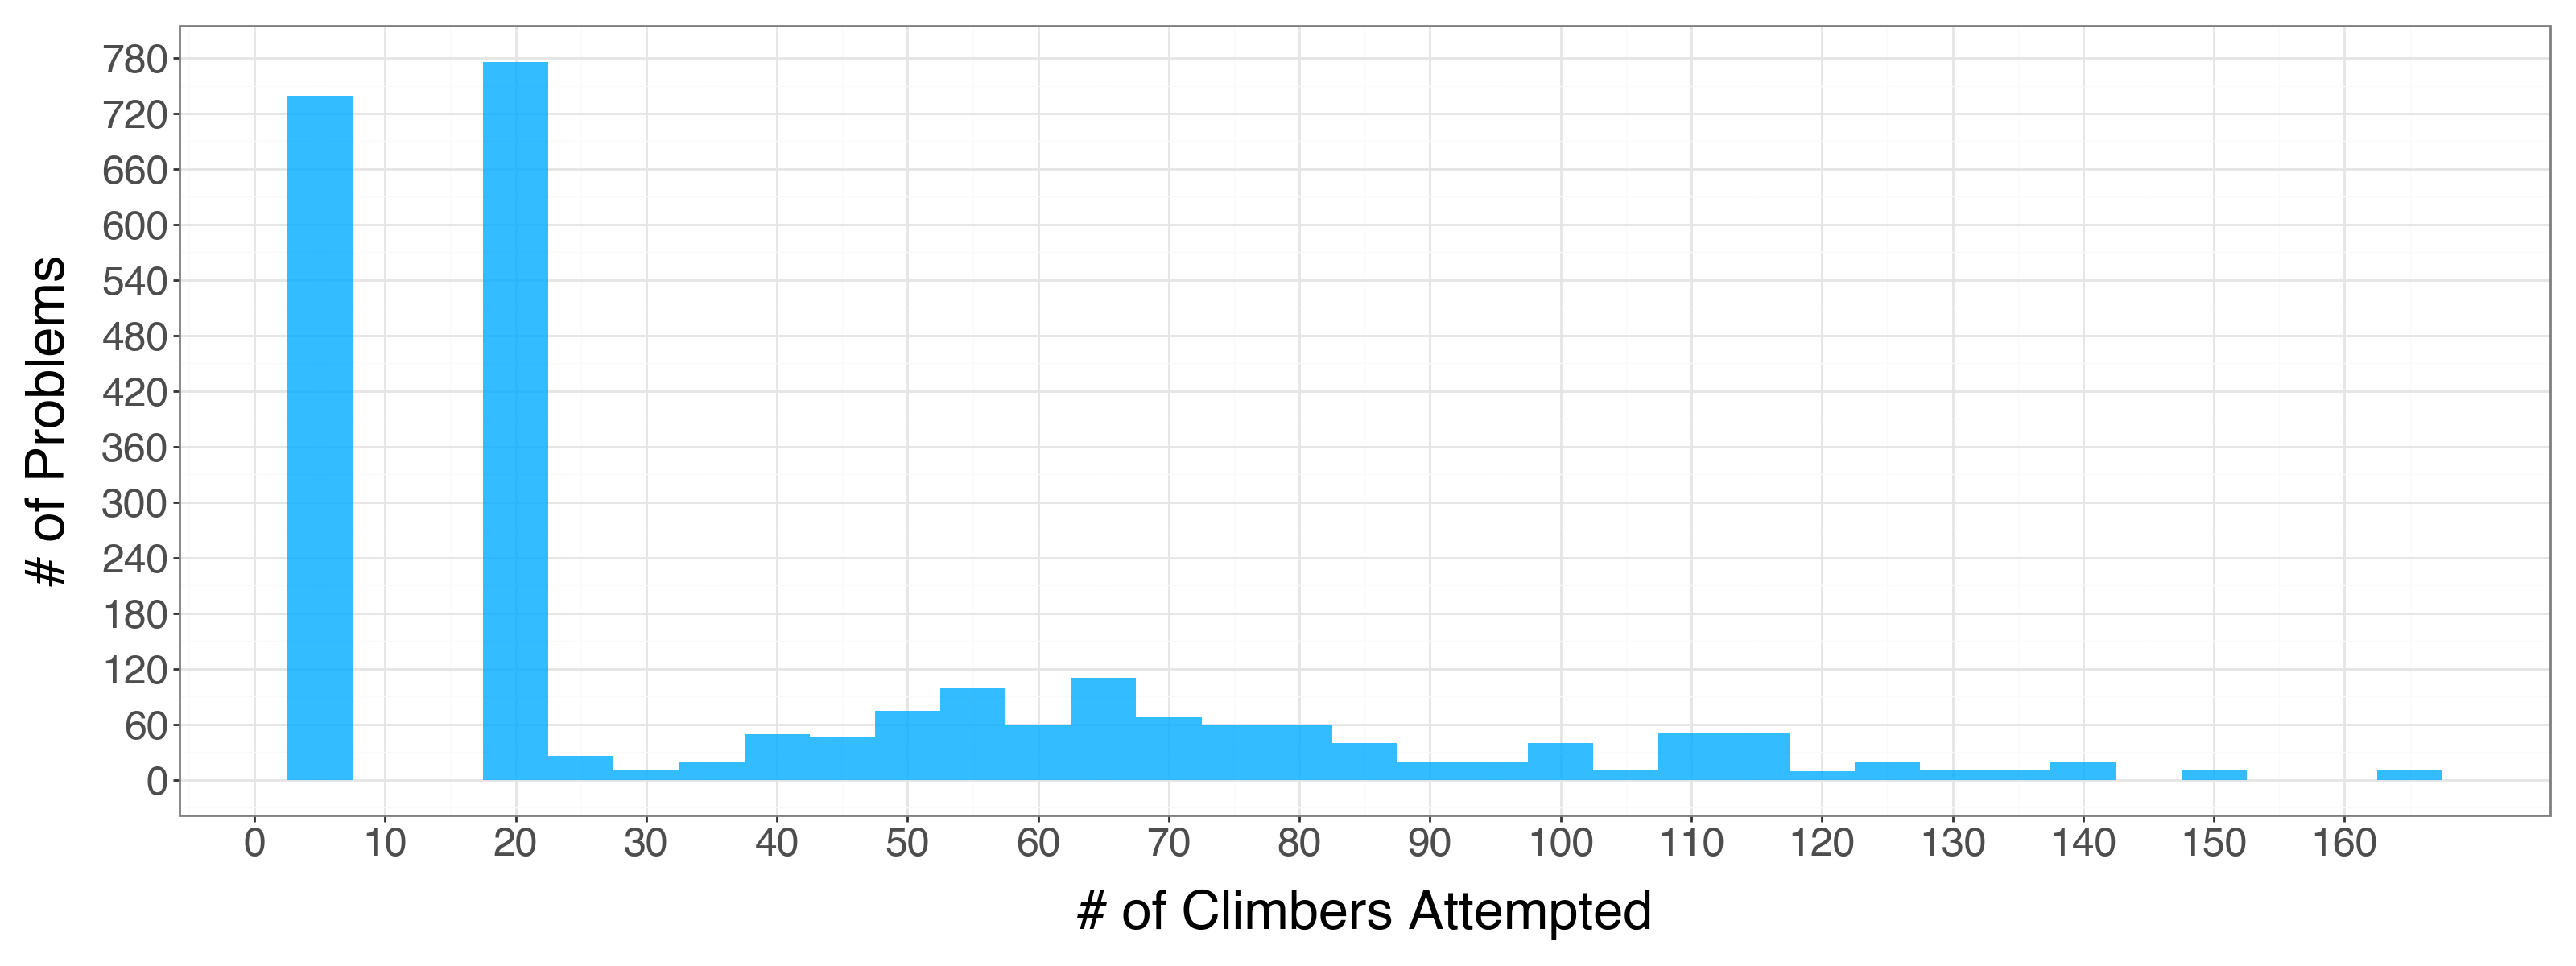

In [280]:
problem_id_counts = df['Problem_ID'].value_counts().reset_index()
problem_id_counts.columns = ['Problem_ID', 'Frequency']

plotnine.options.figure_size = (16,6)
p = (
    ggplot(problem_id_counts, aes(x='Frequency'))
    + geom_histogram(binwidth=5, fill='#00abff', alpha = 0.8)
    + labs(
        x='# of Climbers Attempted',
        y='# of Problems'
    )
    + theme_bw()
    + theme(
        axis_title=element_text(size=24),
        axis_text=element_text(size=18),
    )
    + scale_x_continuous(breaks=range(0, 167, 10))
    + scale_y_continuous(breaks=range(0, 900, 60))
)

p.save('results/eda/problem_id_frequency_histogram.png', dpi=700)

p

/Users/victorhau/.pyenv/versions/3.10.2/lib/python3.10/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 14 x 6 in image.
/Users/victorhau/.pyenv/versions/3.10.2/lib/python3.10/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: results/eda/problem_id_occurrence_cdf.png


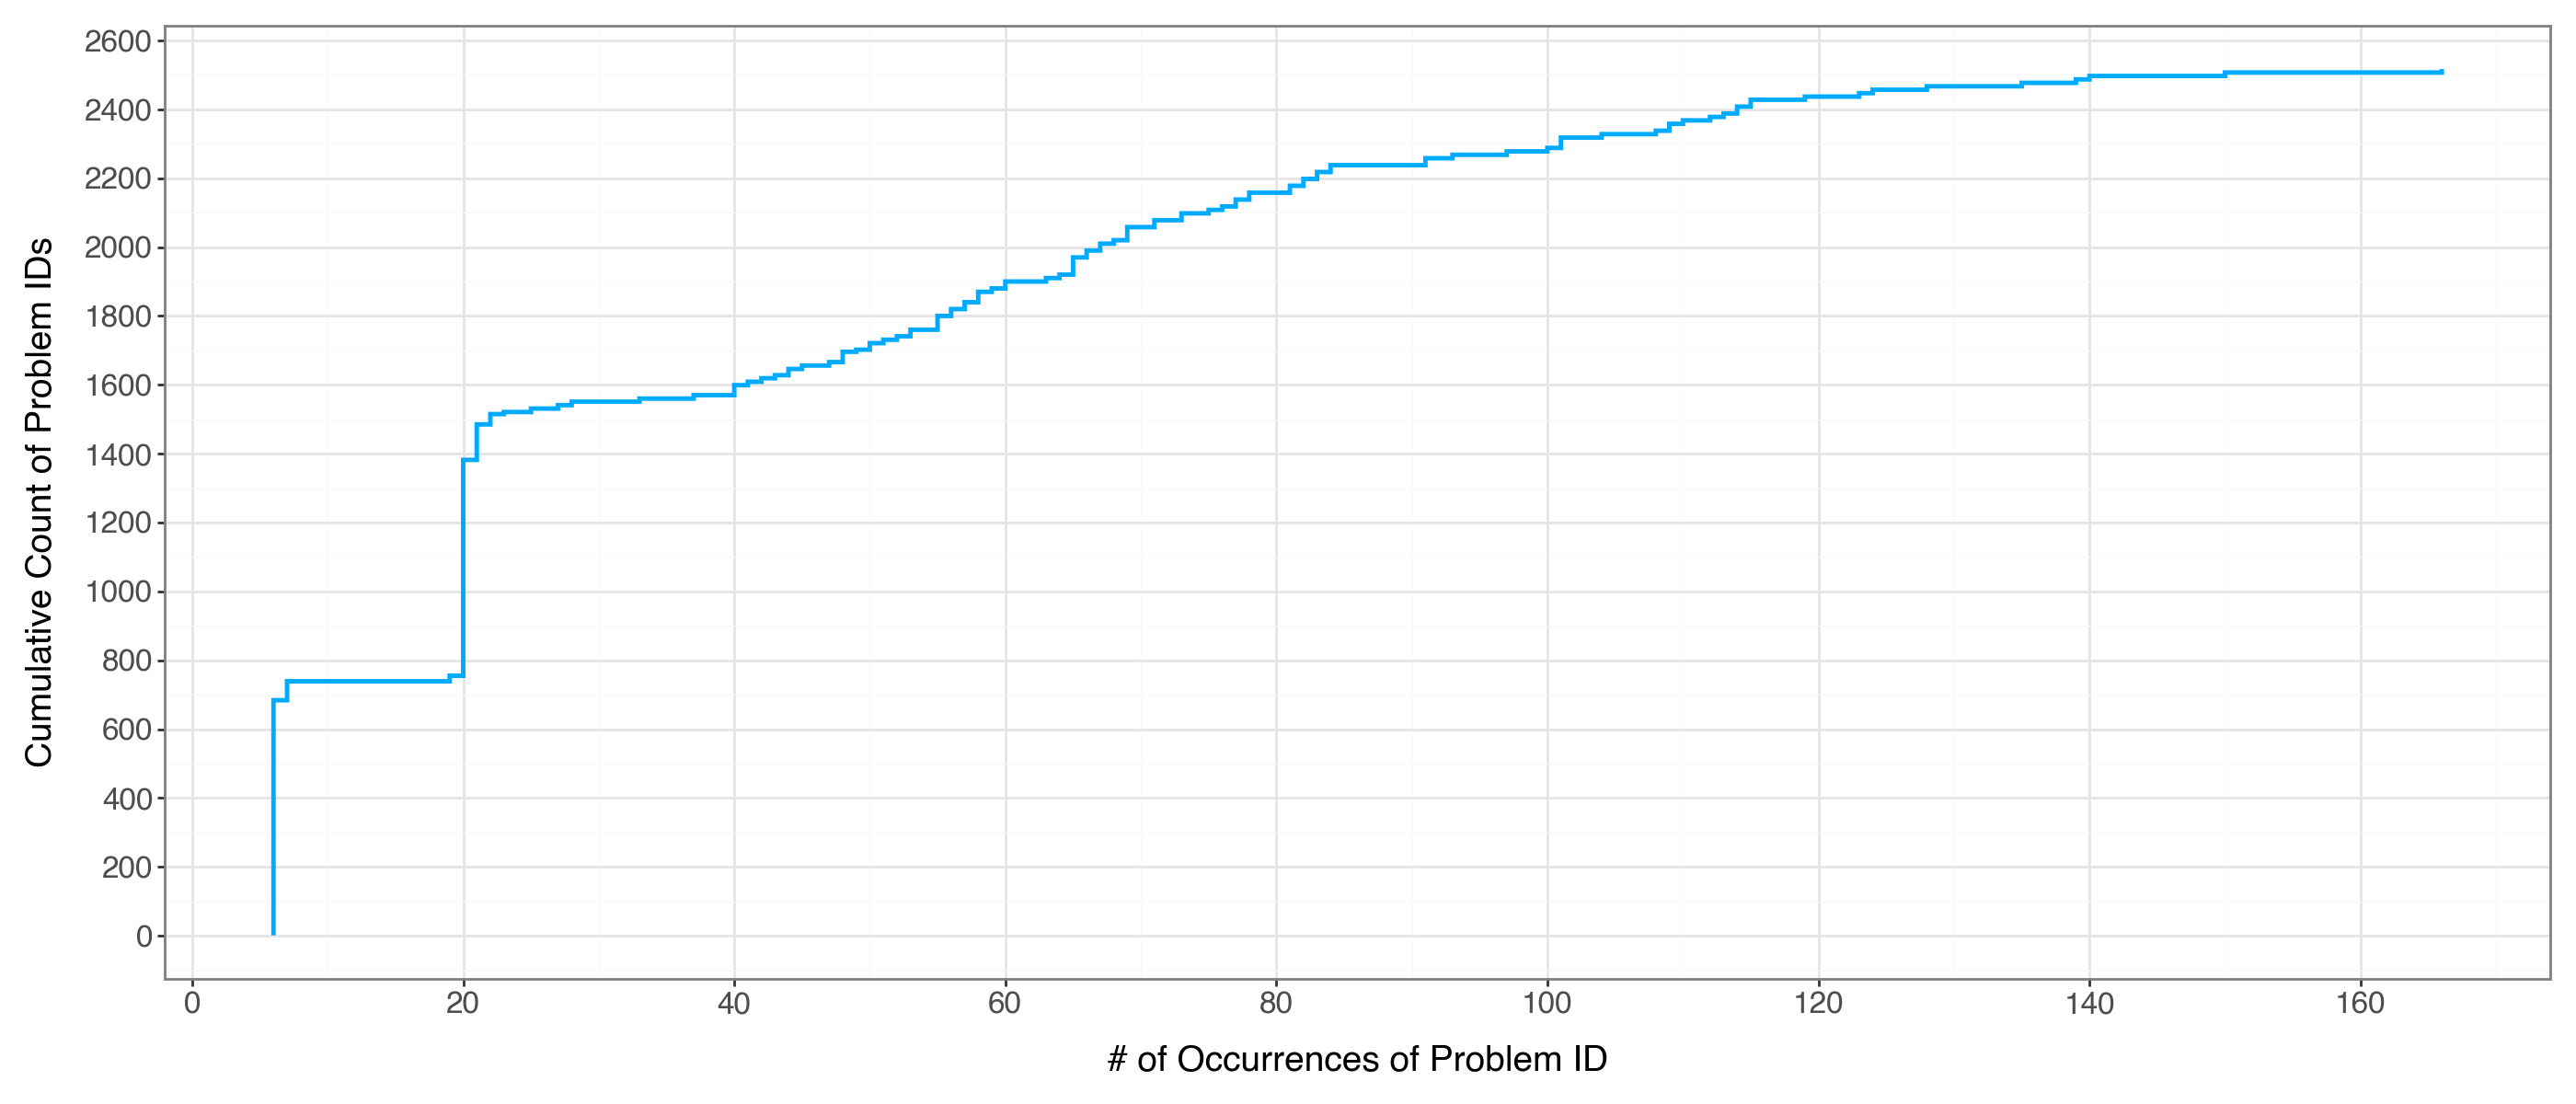

In [264]:
problem_id_counts = df['Problem_ID'].value_counts().reset_index()
problem_id_counts.columns = ['Problem_ID', 'Occurrences']

problem_id_counts = problem_id_counts.sort_values('Occurrences')
problem_id_counts['Cumulative_Count'] = range(1, len(problem_id_counts) + 1)
plotnine.options.figure_size = (14,6)

p = (
    ggplot(problem_id_counts, aes(x='Occurrences', y='Cumulative_Count'))
    + geom_step(direction='hv', color='#00abff', size=1)
    + labs(
        x='# of Occurrences of Problem ID',
        y='Cumulative Count of Problem IDs'
    )
    + theme_bw()
    + theme(
        axis_title=element_text(size=14),
        axis_text=element_text(size=12)
    )
    + scale_x_continuous(breaks=range(0, 170, 20))
    + scale_y_continuous(breaks=range(0, 2700, 200))
)

p.save('results/eda/problem_id_occurrence_cdf.png', dpi=300)

p

### Height of climbers 

In [58]:
height_df = pd.read_csv('data/climbers_heights.csv')

,Unnamed: 0,Name,ID,Height
0,0,Jernej Kruder,1124,179.0
1,2,Sean Mccoll,1559,169.0
2,5,Jan Hojer,3422,188.0
3,7,Kokoro Fujii,2272,176.0
4,9,Aleksei Rubtsov,79,178.0


/Users/victorhau/.pyenv/versions/3.10.2/lib/python3.10/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/victorhau/.pyenv/versions/3.10.2/lib/python3.10/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: results/eda/height_density_plot.png


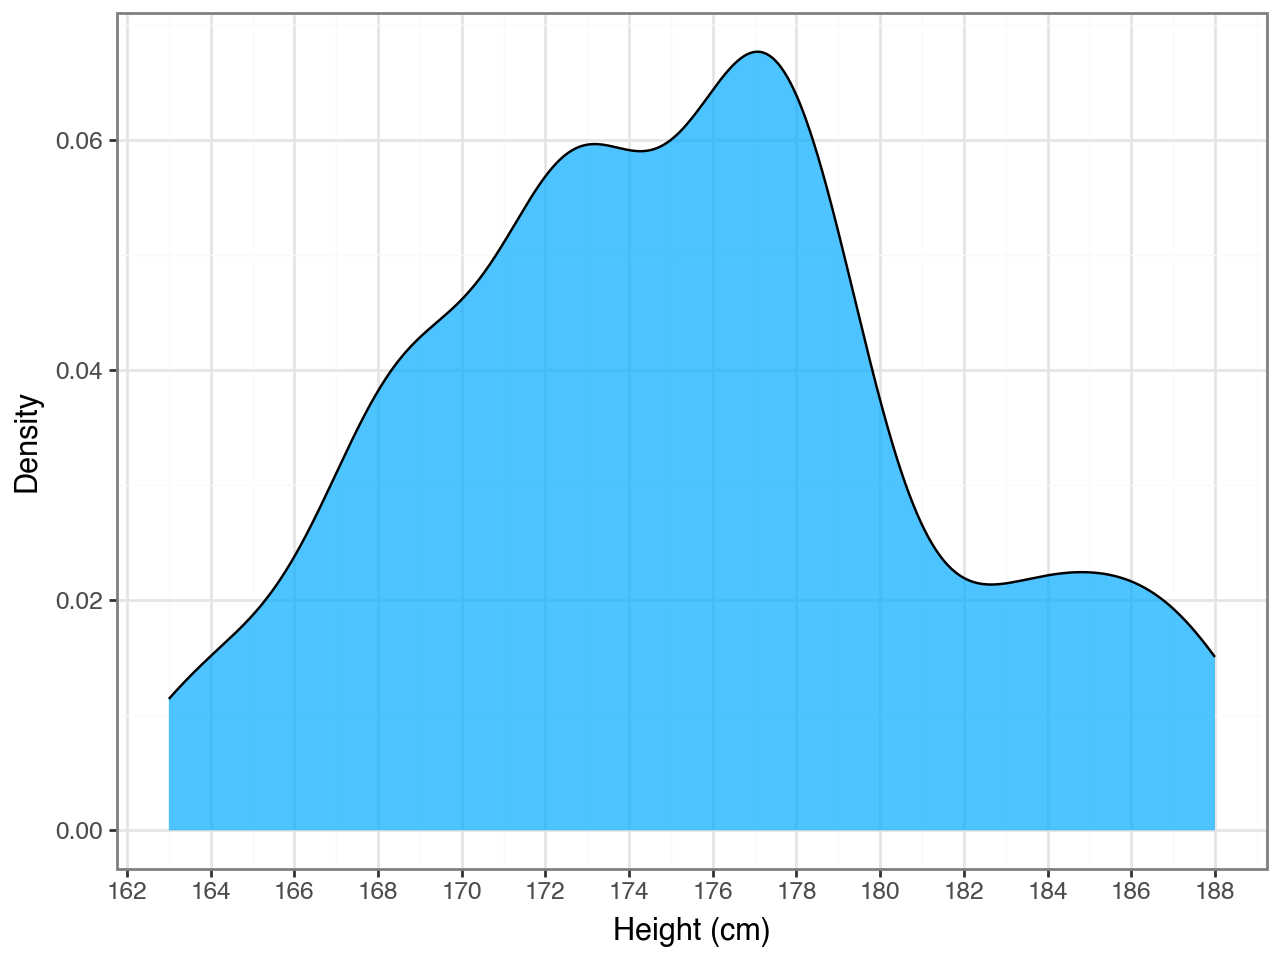

In [97]:
p = (
    ggplot(height_df, aes(x='Height'))
    + geom_density(fill='#00abff', alpha=0.7)
    + labs(x='Height (cm)', y='Density')
    + theme_bw()
    + scale_x_continuous(breaks=range(160, 191, 2))
)
p.save('results/eda/height_density_plot.png', dpi=300)

p

/Users/victorhau/.pyenv/versions/3.10.2/lib/python3.10/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 12 x 6 in image.
/Users/victorhau/.pyenv/versions/3.10.2/lib/python3.10/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: results/eda/height_histogram.png


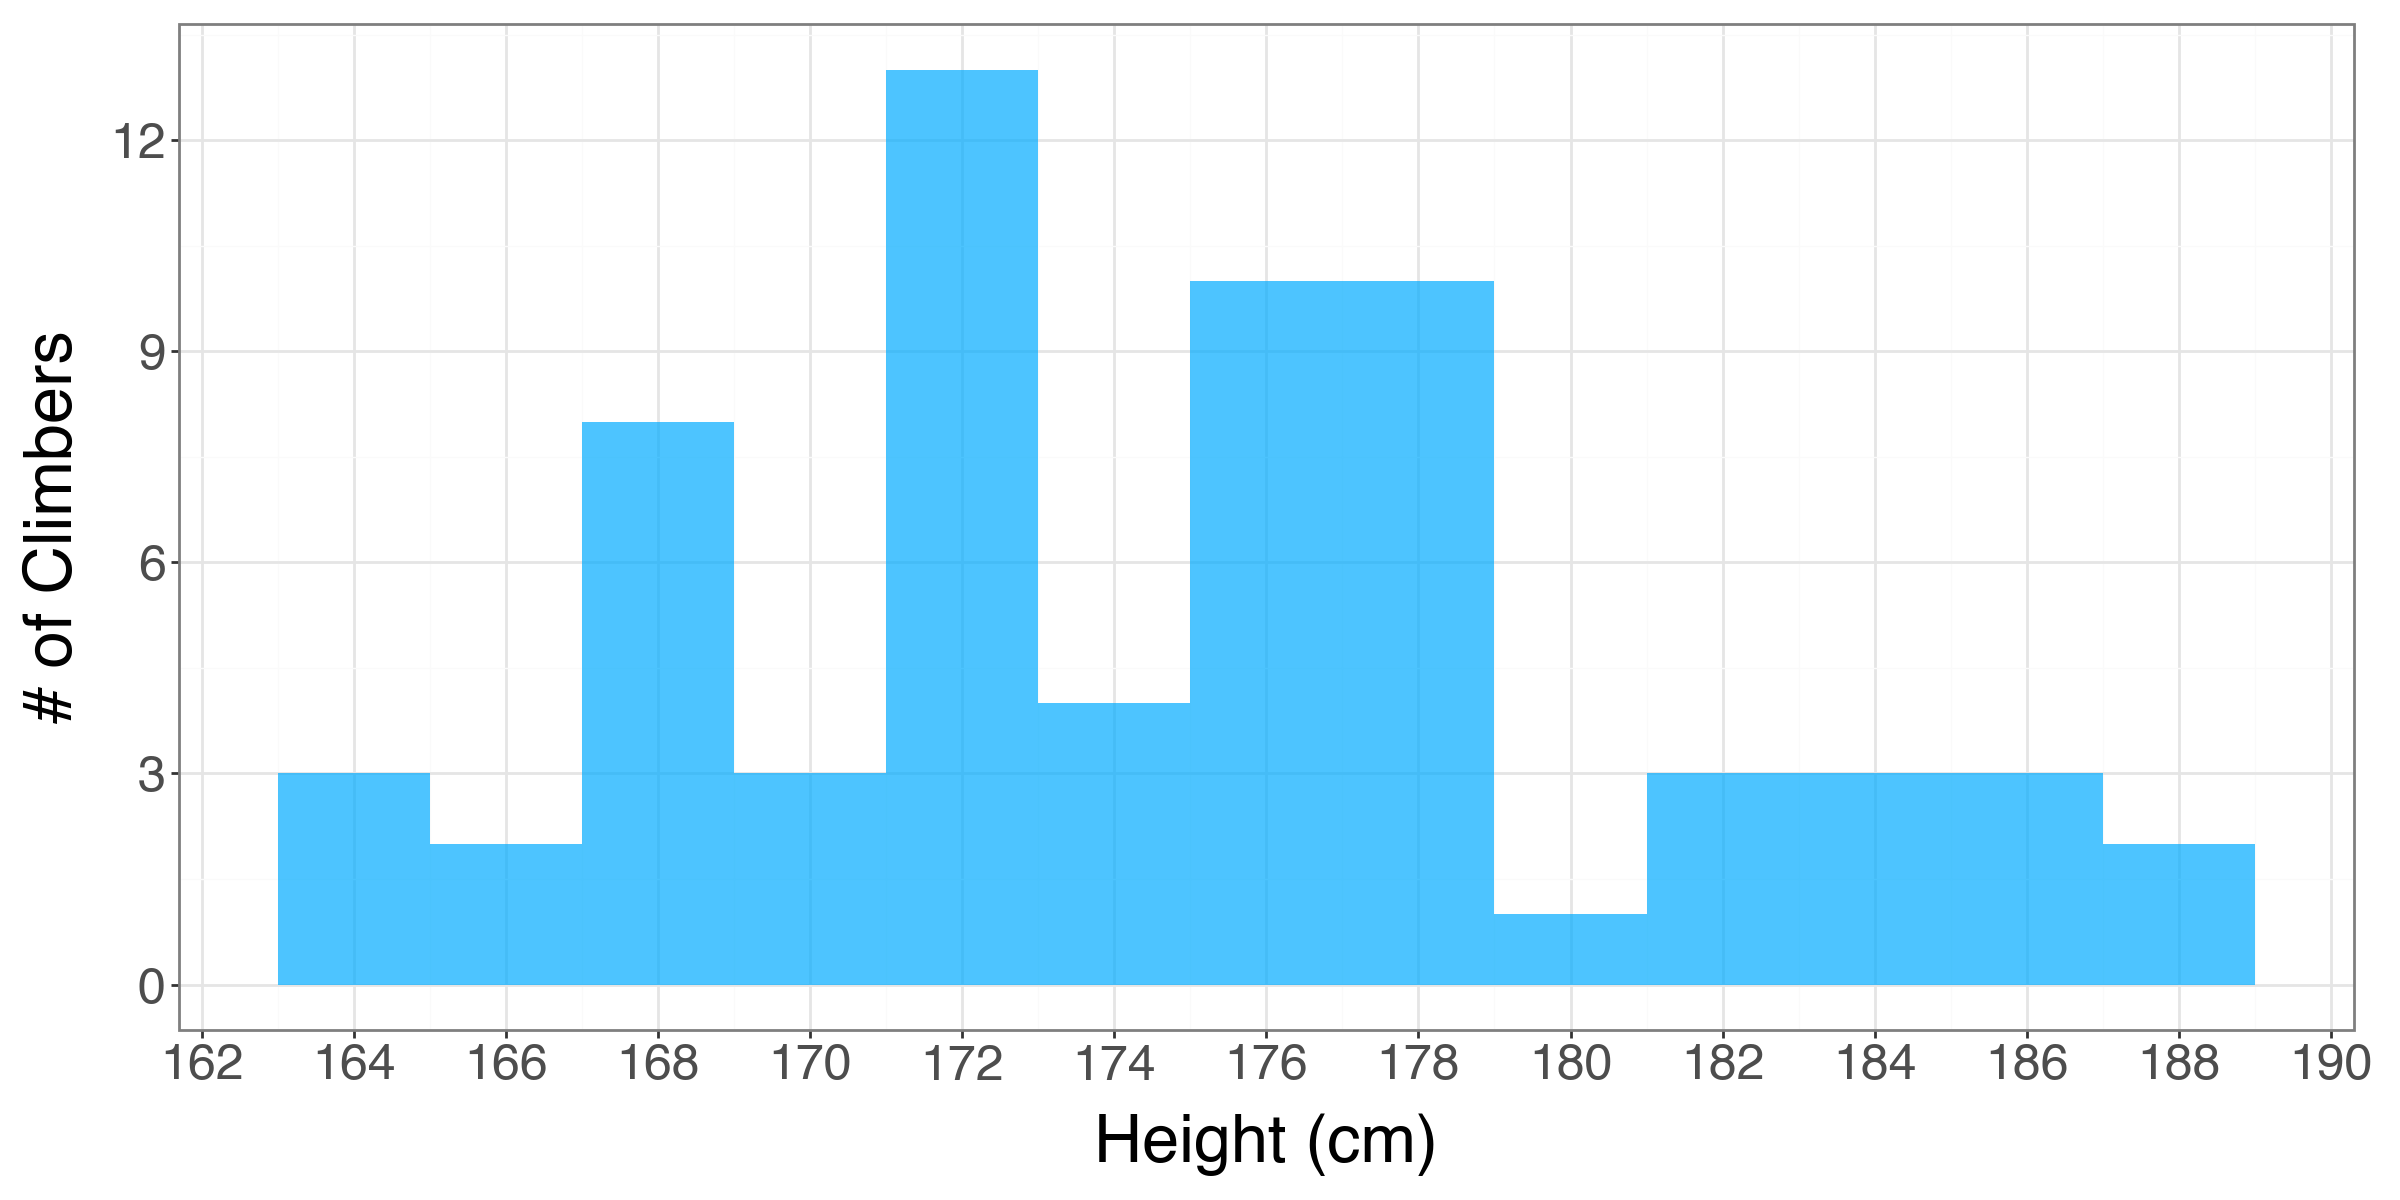

In [278]:
plotnine.options.figure_size = (12,6)

p = (
    
    ggplot(height_df, aes(x='Height'))
    + geom_histogram(binwidth=2, fill='#00abff', alpha = 0.7)
    + labs(x='Height (cm)', y='# of Climbers')
    + theme_bw()
    + scale_x_continuous(breaks=range(160, 191, 2))
    + scale_y_continuous(breaks=range(0, 15, 3))
    + theme(axis_title=element_text(size=24), axis_text=element_text(size=18))
)
p.save('results/eda/height_histogram.png', dpi=1000)
p